1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

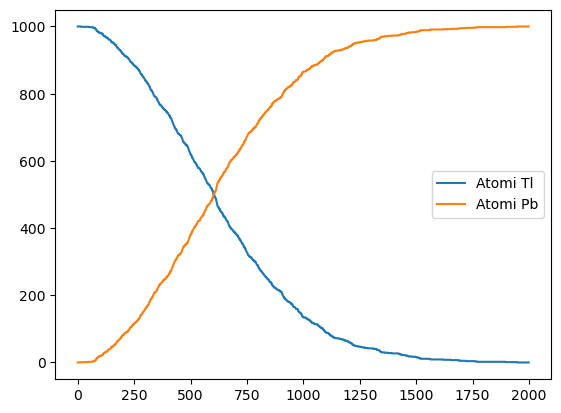

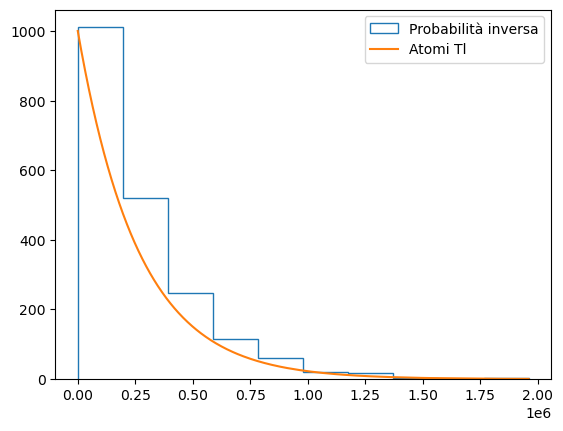

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Costanti
tau = 3052 * 60  #mezza vita in secondi
num_atomi = 1000  #numero di atomi di Talio iniziali

#Inizializzazione del numero di atomi per Talio e Piombo
tl_atomi = [num_atomi]
pb_atomi = [0]

#funzione per la probabilità di decadimento
def p(t, tau):
    return 1 - 2**(-t/tau)

#numero di step temporali
N_steps = 2000


#---->1<----
#ciclo per calcolare il numero di atomi che decadono ad ogni step
for t in range(1, N_steps):

    #genero numeri casuali per la probabilità di decadimento
    atomi = np.random.random(tl_atomi[-1])
    
    #calcolo il numero di atomi che decidono
    decayed = np.sum(atomi < p(t, tau)) 
    
    #aggiorno
    tl_atomi.append(tl_atomi[-1] - decayed)
    pb_atomi.append(pb_atomi[-1] + decayed)
    
#grafico con i risultati
plt.plot(tl_atomi, label = "Atomi Tl")
plt.plot(pb_atomi, label = "Atomi Pb")
plt.legend()
plt.show()


#---->2<----

#p_2 inversa
def inverse_p2(x):
    return -tau*np.log2(1 - x)

#decadimento degli atomi Tl
un = np.random.random(N_steps)
x = inverse_p2(un)

#grafico con i risultati
plt.hist(x, histtype = 'step', label="Probabilità inversa")
plt.plot(np.sort(x), (1 - (np.sort(un)))*1000, label = "Atomi Tl")
plt.legend()
plt.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

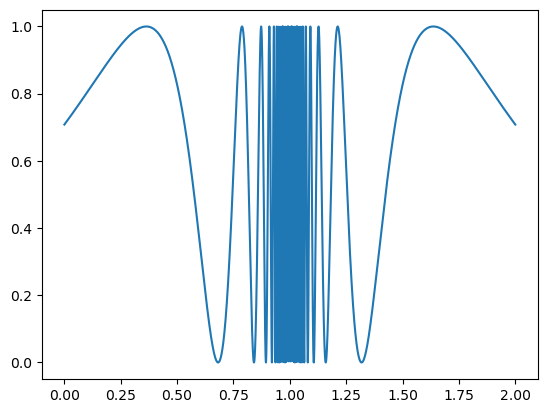

Mean of integral of f(x) with hit and miss method: 1.3478660000000002
Standard Deviation of integral of f(x) with hit and miss method: 0.0008722754381501283

Mean of integral of f(x) with mean value method: 1.3377637766782744

Integral reference value calculated with trapz: 1.3476352527116469
Error with hit and miss method: 0.00023074728835337233
Error with mean value method: 0.009871476033372462

The hit-miss method is more accurate


In [19]:
import numpy as np
import matplotlib.pyplot as plt

#definiamo la funzione da integrare
def f(x):
    return np.sin(1/(1-x))**2

N = 10000

#plot della funzione
x = np.linspace(0, 2, N)
y = f(x)
plt.plot(x, y)
plt.show()


#---->1<----

#integrazione Monte Carlo - metodo Hit/Miss
integrali = []
step = 100

for a in range(step):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    I = 2 * count / N
    integrali.append(I)

media = np.mean(integrali) #media
dev = np.std(integrali)/np.sqrt(step) #deviazione standard scalata

print(f"Mean of integral of f(x) with hit and miss method: {media}")
print(f"Standard Deviation of integral of f(x) with hit and miss method: {dev}")


#---->2<----

#integrazione Monte Carlo - metodo mean value
x_casuali = np.random.uniform(0, 2, N)
y_casuale = f(x_casuali)
media_2 = 2*np.mean(f(x_casuali)) #(2-0)=2
dev_2 = np.std(y_casuale)/np.sqrt(N) #deviazione standard scalata
print(f"\nMean of integral of f(x) with mean value method: {media_2}")

#valutazione dell'errore (valore di riferimento calcolato con np.trapz)
x = np.linspace(0, 2, N)
Integral_ref = np.trapz(f(x) ,x)

err_hitmiss = np.abs(Integral_ref-media)
err_meanval = np.abs(Integral_ref-media_2)

print(f"\nIntegral reference value calculated with trapz: {Integral_ref}")
print(f"Error with hit and miss method: {err_hitmiss}")
print(f"Error with mean value method: {err_meanval}")

if(err_meanval > err_hitmiss):
    print("\nThe hit-miss method is more accurate")
else: 
    print("\nThe mean value method is more accurate")



3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [24]:
import numpy as np

#numero di punti da generare
N = 100000

#---->1<----

#genero N coppie di numeri casuali (x, y)
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

#conto quanti punti cadono all'interno del cerchio
count = 0
for i in range(N):
    if x[i]**2 + y[i]**2 <= 1:
        count += 1

#calcolo l'area del cerchio come il rapporto tra i punti all'interno del cerchio e il numero totale di punti
area = 4*count/N
print("L'area del cerchio di raggio 1 è:", area)


#---->2<----

#dimensioni
D = 10

#genero N coppie di numeri casuali (x_0, x_1, ..., x_D)
x_D = np.random.uniform(-1, 1, (N, D))

#conto quanti punti cadono all'interno della sfera
count_D = 0
for i in range(N):
    s = 0
    for j in range(D):
        s += x_D[i, j]**2
    if s <= 1:
        count_D += 1

#calcolo l'area della sfera come il rapporto tra i punti all'interno della sfera e il numero totale di punti
area_D = (2**D*count_D)/N

print(f"L'area della sfera di dimensione {D}D è: {area_D}")

L'area del cerchio di raggio 1 è: 3.14892
L'area della sfera di dimensione 10D è: 2.4064


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [35]:
#funzione da integrare
def f(x):
    return (x**(-1/2))/(np.exp(x)+1)

#peso della funzione
def w(x):
    return 1/np.sqrt(x)

#numero di campioni
N = 100000

x0 = np.random.random(N) #tra 0 e 1
w_integral = np.sum(w(x0))/N

x_1 = np.random.uniform(0, 1, N)**2
I_res = (np.sum(f(x_1)/w(x_1))*w_integral)/N

print(f"The integral value is {I_res}")


The integral value is 0.8351306302409849
